In [2]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
F = len("Robert")
L = len("Koziarski")

Excercise 1 - Generated Quantities Block

In [4]:
gen_quant = CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:compiling stan file /home/labs/DataAnalytics2023/Lab2/code_1.stan to exe file /home/labs/DataAnalytics2023/Lab2/code_1


INFO:cmdstanpy:compiled model executable: /home/labs/DataAnalytics2023/Lab2/code_1
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/labs/DataAnalytics2023/Lab2/code_1.hpp /home/labs/DataAnalytics2023/Lab2/code_1.stan
Warning in '/home/labs/DataAnalytics2023/Lab2/code_1.stan', line 7, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/lib/sundials_6.0.0/include -I stan/lib/stan_math/lib/sundials_6.0.0/src/sundials    -

In [5]:
samples = gen_quant.sample(data={'M':F}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [6]:
samples.column_names

('lp__',
 'accept_stat__',
 'lambda',
 'y_sim[1]',
 'y_sim[2]',
 'y_sim[3]',
 'y_sim[4]',
 'y_sim[5]',
 'y_sim[6]')

In [7]:
data = samples.draws()[:,:,2:]

In [8]:
df = pd.DataFrame(data.reshape((1000, 7)))
df.columns = samples.column_names[2:]
df.head()

,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],y_sim[6]
0,130.6090,122.0,119.0,146.0,125.0,134.0,134.0
1,99.8783,110.0,99.0,103.0,111.0,81.0,104.0
2,117.3040,117.0,119.0,116.0,109.0,108.0,131.0
3,39.9134,44.0,46.0,46.0,37.0,40.0,52.0
4,57.1529,47.0,51.0,55.0,61.0,73.0,62.0


[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


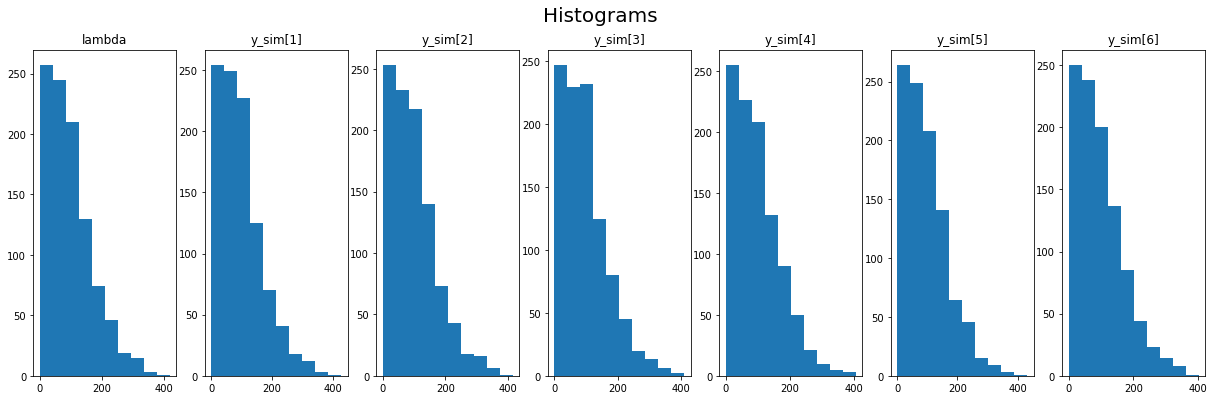

In [9]:
fig, axes = plt.subplots(1, 7, figsize=(21, 6))

for i, ax in enumerate(axes):
    ax.hist(df.iloc[:, i])
    ax.set_title(df.columns[i])

plt.show()


Excercise 2 - Constraints on the data


In [10]:
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})

INFO:cmdstanpy:compiling stan file /home/labs/DataAnalytics2023/Lab2/code_2.stan to exe file /home/labs/DataAnalytics2023/Lab2/code_2


INFO:cmdstanpy:compiled model executable: /home/labs/DataAnalytics2023/Lab2/code_2
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/labs/DataAnalytics2023/Lab2/code_2.hpp /home/labs/DataAnalytics2023/Lab2/code_2.stan
Warning in '/home/labs/DataAnalytics2023/Lab2/code_2.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/stan_math/lib/boost_1.75.0 -I stan/lib/stan_math/lib/sundials_6.0.0/include -I stan/lib/stan_math/lib/sundials_6.0.0/src/sundials    -


INFO:cmdstanpy:CmdStan done processing.


In [11]:
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]}) # this will work because it fits the constraints
try:
    samp_bern2_incorrect = bern2.sample(data={'N':2, 'y':[0,2]}) # this won't work as the contstraints specify max 1 value for 'y'
except:
    print("ERROR: constraints unsatisfied")

INFO:cmdstanpy:compiling stan file /home/labs/DataAnalytics2023/Lab2/code_3.stan to exe file /home/labs/DataAnalytics2023/Lab2/code_3
INFO:cmdstanpy:compiled model executable: /home/labs/DataAnalytics2023/Lab2/code_3
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/labs/DataAnalytics2023/Lab2/code_3.hpp /home/labs/DataAnalytics2023/Lab2/code_3.stan
Warning in '/home/labs/DataAnalytics2023/Lab2/code_3.stan', line 3, column 1: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.3.9 -I stan/lib/


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [2] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [3] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [4] error: error during processing Operation not permitted
chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed

INFO:cmdstanpy:CmdStan done processing.



ERROR: constraints unsatisfied



Excercise 3 - Constraints on parameters  
Unconstrained parameters

In [12]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()

INFO:cmdstanpy:compiling stan file /home/labs/DataAnalytics2023/Lab2/code_4.stan to exe file /home/labs/DataAnalytics2023/Lab2/code_4


INFO:cmdstanpy:compiled model executable: /home/labs/DataAnalytics2023/Lab2/code_4
INFO:cmdstanpy:created output directory: /home/labs/DataAnalytics2023/Lab2/samples
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▏         | 00:00 Status


chain 1 |██        | 00:00 Iteration: 1200 / 7000 [ 17%]  (Sampling)


chain 1 |████▍     | 00:00 Iteration: 2900 / 7000 [ 41%]  (Sampling)


chain 1 |██████    | 00:00 Iteration: 4100 / 7000 [ 58%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/labs/DataAnalytics2023/Lab2/samples/code_4-20230712083233_1.csv, /home/labs/DataAnalytics2023/Lab2/samples/code_4-20230712083233_2.csv, /home/labs/DataAnalytics2023/Lab2/samples/code_4-20230712083233_3.csv, /home/labs/DataAnalytics2023/Lab2/samples/code_4-20230712083233_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n9489 of 24000 (39.54%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

In [13]:
out_gamma1.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-1.4,0.018,0.91,-3.200,-1.00,-0.66,2500.0,1600.0,1.0
theta,1.0,0.018,0.90,0.094,0.75,2.80,2600.0,1700.0,1.0


In [14]:
out_gamma1.draws_pd()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,theta
0,-3.017490,0.665349,0.515677,1.0,3.0,1.0,4.051440,2.605520
1,-3.809620,0.999326,0.515677,3.0,7.0,0.0,3.849190,3.285610
2,-4.223570,0.999634,0.515677,2.0,3.0,0.0,4.232830,3.637090
3,-4.127300,1.000000,0.515677,3.0,7.0,0.0,4.226860,3.555540
4,-6.091990,0.832386,0.515677,2.0,6.0,1.0,6.942000,5.203460
...,...,...,...,...,...,...,...,...
23995,-0.654818,0.997837,0.368252,2.0,7.0,0.0,0.672250,0.173249
23996,-0.711693,0.977990,0.368252,1.0,1.0,0.0,0.712111,0.091863
23997,-0.711693,0.000000,0.368252,0.0,1.0,1.0,0.997086,0.091863
23998,-0.711693,0.000000,0.368252,0.0,1.0,1.0,0.968332,0.091863


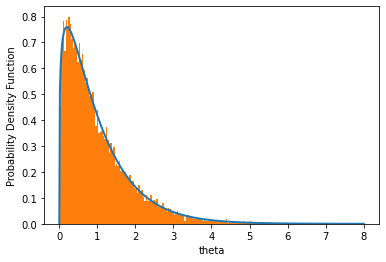

In [23]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

# add histogram of theta samples with 160 bins
plt.hist(out_gamma1.draws_pd(inc_warmup=False)["theta"], density=True, bins=200)

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()


Constrained parameter


In [16]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:compiling stan file /home/labs/DataAnalytics2023/Lab2/code_5.stan to exe file /home/labs/DataAnalytics2023/Lab2/code_5
INFO:cmdstanpy:compiled model executable: /home/labs/DataAnalytics2023/Lab2/code_5
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▊        | 00:00 Iteration: 1001 / 7000 [ 14%]  (Sampling)


chain 1 |███▊      | 00:00 Iteration: 2400 / 7000 [ 34%]  (Sampling)





chain 1 |█████▌    | 00:00 Iteration: 3700 / 7000 [ 52%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: /home/labs/DataAnalytics2023/Lab2/samples/code_5-20230712083248_1.csv, /home/labs/DataAnalytics2023/Lab2/samples/code_5-20230712083248_2.csv, /home/labs/DataAnalytics2023/Lab2/samples/code_5-20230712083248_3.csv, /home/labs/DataAnalytics2023/Lab2/samples/code_5-20230712083248_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n2 of 24000 (0.01%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

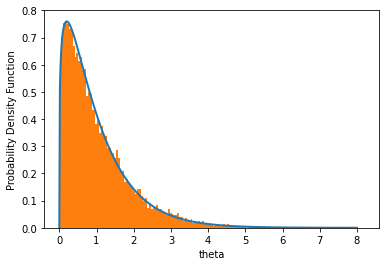

In [17]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

# add histogram of theta samples from the second model with 160 bins
plt.hist(out_gamma2.draws_pd(inc_warmup=False)["theta"], density=True, bins=160)

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

##### Actually, I saw no output alteration between those two models (with constrain and without - input data was probably correct, so I'd expect that)


Excercise 4 - Selection of parameters using equation solving


In [27]:
model_tune = CmdStanModel(stan_file='code_6.stan')

y0 = 1 # initial guess for the equation solving

data={'y_guess':[y0],
        'theta':[(F+L)/2]}

tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [29]:
print(f"Std dev. of half normal with 99% of samples less than: {F+L/2} is: {tunes.draws()[0][0][-1]}")

Std dev. of half normal with 99% of samples less than: 10.5 is: 2.91168



Excercise 5 - different methods of defining models


In [26]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
seed = 9052000 #integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
data_1 = model_samp_st.sample(data={'N': F}, seed=seed)
data_2 = model_log_target.sample(data={'N': F}, seed=seed)
data_3 = model_log_target_ind.sample(data={'N': F}, seed=seed)

INFO:cmdstanpy:found newer exe file, not recompiling


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)





chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |██████████| 00:00 Iteration: 1900 / 2000 [ 95%]  (Sampling)





chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)



chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


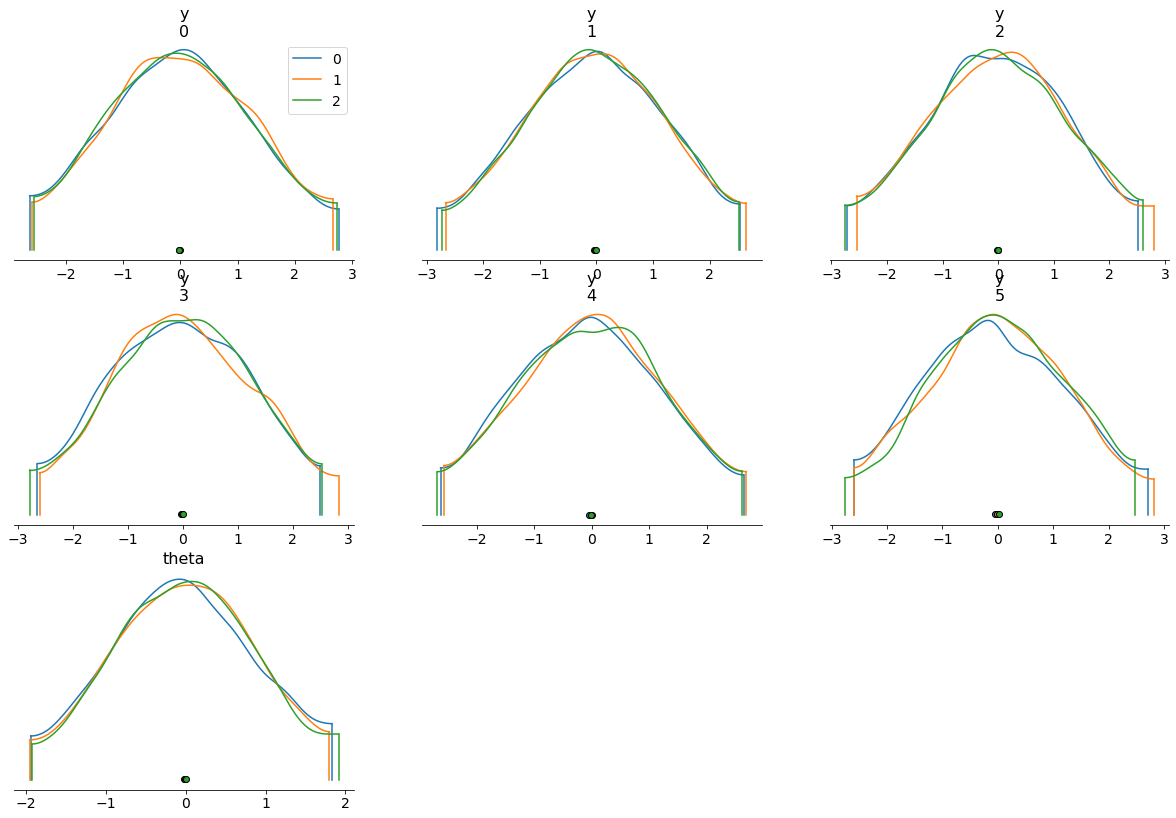

In [33]:
az.plot_density([data_1,data_2,data_3]) # F = 6, so y0, ..., y5 and 3 plots for each (3 models)
plt.show()


Excercise 6 - generated quantities post sampling


In [36]:
model_gq = CmdStanModel(stan_file='code_10.stan')
mean_of_y = model_gq.generate_quantities(data={'N': F},
                                        mcmc_sample=data_3) # chosen result 3

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [4] done processing


INFO:cmdstanpy:Chain [3] done processing


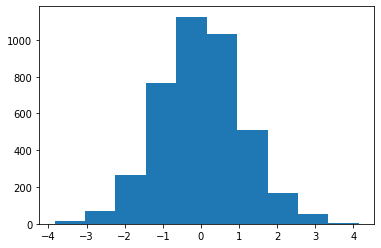

In [37]:
plt.hist(mean_of_y.draws_pd()["mean_y"])
plt.show()

looks like more samples on the negative side, but definitely most of them in the middle: [-1, 1]